<div>
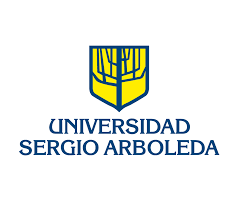<br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Darwin Nuñez
<br>
<i><b>Asignatura:</b></i> Introducción a Sistemas Inteligentes
<br>
<i><b>Estudiante:</b></i> Laura Ojeda, Daniel Velásquez y Santiago Niño
<br>
<i><b>Tema:</b></i> Regresión y regularización
<br>
<br> 9 de abril del 2024
<br>
</FONT>
</div>

#Bibliotecas

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
#from google.colab import drive

#Punto 1

Cree la función que recibe como parámetros la cantidad y dimensión de los puntos, y retorne una estructuralineal con la información de los puntos (puede ser una lista)

In [ ]:
def crear_puntos(cantidad, dimension):
    """
    Crea una lista de puntos en un espacio de dimensiones específico.

    Args:
        cantidad (int): El número de puntos que se desean generar.
        dimension (int): La dimensión del espacio en el que se generan los puntos.

    Returns:
        list: Una lista de puntos representados como listas de coordenadas en el espacio.
    """
    puntos = []
    for i in range(cantidad):
        punto = [(i+1) * (j + random.uniform(-0.5, 0.5)) for j in range(1, dimension + 1)]
        puntos.append(punto)
    return puntos

cantidad_puntos = 50
dimension_puntos = 2

lista_puntos = crear_puntos(cantidad_puntos, dimension_puntos)
print("Lista de puntos:", lista_puntos)


Lista de puntos: [[1.1472463275976743, 1.935834088552026], [2.7184047106859355, 4.928237248302558], [2.1135029256886453, 5.995345933718627], [5.336953576482777, 8.139888579821761], [5.500577788706311, 8.241535246079339], [7.161926824382185, 12.72388326399291], [3.985140465328125, 10.55641117640233], [4.5389793562567835, 18.01923120189398], [11.716248933641422, 19.026280778737718], [6.448191549080205, 17.237276198888527], [11.13362104465794, 22.227151205894913], [13.565682330869485, 21.01612352306773], [10.340218524163706, 25.21194972410108], [14.04613773977246, 27.544562445101295], [21.128604731257816, 25.539080819047708], [15.241505332304225, 38.124370797986465], [17.721352128322415, 34.05166644085037], [20.186470977898068, 40.83222680177984], [26.79922186728123, 40.133509783586206], [10.667934914034307, 32.83925615686536], [18.309937198781054, 46.33085845411084], [28.639240766595773, 49.46631352809784], [20.846652705315194, 50.1888082624796], [16.725563145558308, 38.91760497614063], 

#Punto 2


 Cree la función que pinte los puntos en las primeras 2 dimensiones de los puntos y la línea aproximada en las mismas dimensiones.

In [ ]:
def graficar_recta_con_puntos(puntos, pendiente, intercepto):
    """
    Grafica una recta junto con una serie de puntos en un plano bidimensional.

    Args:
        puntos (list): Una lista de puntos representados como listas de coordenadas en el plano.
        pendiente (float): La pendiente de la recta.
        intercepto (float): El intercepto en el eje y de la recta.

    Returns:
        None

    Esto mostrará un gráfico con la recta y los puntos proporcionados.
    """
    # Extraer las coordenadas de las primeras dos dimensiones
    x = np.array([p[0] for p in puntos])
    y = np.array([p[1] for p in puntos])

    # Definir el rango de valores de x para la línea
    x_linea = np.linspace(min(x), max(x), 100)

    # Calcular los valores correspondientes de y para la línea
    y_linea = pendiente * x_linea + intercepto

    plt.figure(figsize=(8, 6))

    # Crear el gráfico de la línea y los puntos
    plt.plot(x_linea, y_linea, color='red', label='Recta')
    plt.scatter(x, y, color='blue', label='Puntos')

    # Añadir etiquetas y leyenda
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')
    plt.title('Gráfico de la recta con puntos')
    plt.legend()

    # Mostrar el gráfico
    plt.grid(True)
    plt.show()

Funcion para regresion multivariada

In [ ]:
def graficar_recta_multivareada(lista_puntos, pendientes, interceptos, nombres):
    """
    Grafica múltiples rectas junto con una serie de puntos en planos bidimensionales separados.

    Args:
        lista_puntos (list): Una lista de listas de puntos, donde cada sublista representa los puntos en un plano.
        pendientes (list): Una lista de pendientes para cada recta.
        interceptos (list): Una lista de interceptos en el eje y para cada recta.
        nombres (list): Una lista de nombres para etiquetar los ejes x e y de cada gráfico.

    Returns:
        None
    Esto mostrará tres gráficos con rectas y puntos correspondientes, etiquetados con los nombres proporcionados.
    """
    index = 0
    fig, axs = plt.subplots(len(lista_puntos), 1, figsize=(6, 10))
    for i in lista_puntos:
        # Extraer las coordenadas de las primeras dos dimensiones
        x = np.array([p[0] for p in i])
        y = np.array([p[1] for p in i])

        # Definir el rango de valores de x para la línea
        x_linea = np.linspace(min(x), max(x), 100)

        # Calcular los valores correspondientes de y para la línea
        y_linea = pendientes[index] * x_linea + interceptos[index]

        # Crear el gráfico de la línea y los puntos
        axs[index].plot(x_linea, y_linea, color='red', label='Recta')
        axs[index].scatter(x, y, color='blue', label='Puntos')

        # Añadir etiquetas y leyenda
        axs[index].set_xlabel(f'Eje {nombres[0]}')
        axs[index].set_ylabel(f'Eje {nombres[index+1]}')
        axs[index].set_title(f"Gráfico {nombres[0]} vs {nombres[index+1]}")
        axs[index].legend()

        axs[index].grid(True)
        index += 1

    # Ajustar espacio entre subgráficas
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()

#Punto 3


 Cree la función que recibe como parámetros los puntos y retorne la definición de la línea encontrada. En el notebook se debe pintar el resultado usando la función anterior.

In [ ]:
def definicion_linea(puntos):

    """
    Calcula la pendiente y el intercepto de una línea de regresión a partir de una lista de puntos.

    Args:
        puntos (list): Una lista de puntos representados como pares ordenados (x, y).

    Returns:
        tuple: Un par de valores que representan la pendiente (m) y el intercepto (b) de la línea de regresión.
    """


    # Calcular la media de x y de y
    n = len(puntos)
    sum_x = sum(p[0] for p in puntos)
    sum_y = sum(p[1] for p in puntos)
    mean_x = sum_x / n
    mean_y = sum_y / n

    # Calcular la pendiente (m)
    numerador = sum((puntos[i][0] - mean_x) * (puntos[i][1] - mean_y) for i in range(n))
    denominador = sum((p[0] - mean_x) ** 2 for p in puntos)
    pendiente = numerador / denominador

    # Calcular el intercepto (b)
    intercepto = mean_y - pendiente * mean_x

    return pendiente, intercepto

# Obtener los coeficientes de la línea encontrada
pendiente, intercepto = definicion_linea(lista_puntos)
print("Pendiente:", pendiente)
print("Intercepto:", intercepto)

Pendiente: 1.203229959428975
Intercepto: 15.103309779957335


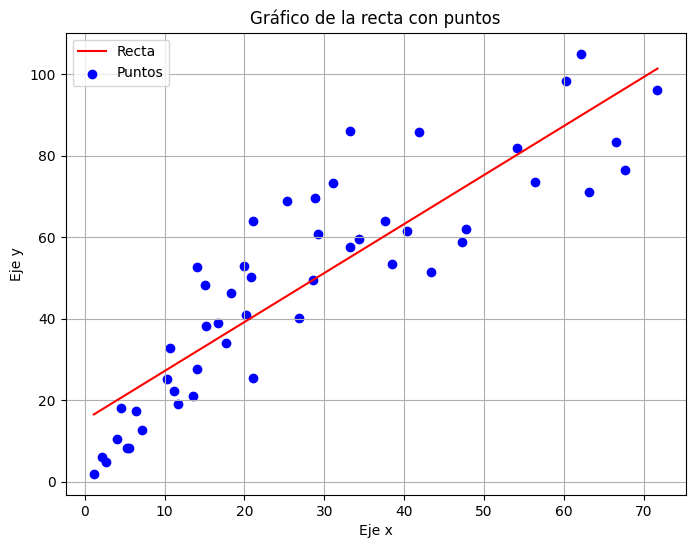

In [ ]:
graficar_recta_con_puntos(lista_puntos, pendiente, intercepto)

#Punto 4

Pruebe la aproximacion construida con al menos dos diferentes fuentes de datos de la inciativa de datos abiertos de Bogotá Nota: En cada caso debe explicar brevemente los datos seleccionados y pintar los puntos seleccionando una de las variables independientes.

##Primera fuente de datos - Malnutrición en población de 5 a 17 años en Bogotá

In [ ]:
# URL del archivo CSV
url = "https://raw.githubusercontent.com/danieeeel11/Datasets/main/SistemasInteligentes/osb_malnutricion5_17anos.csv"

# Cargar el archivo CSV en un DataFrame de pandas
df1 = pd.read_csv(url, encoding="latin-1", delimiter=";")

# Mostrar las primeras filas del DataFrame
df1

,Cod,Área,Casos delgadez,Proporción delgadez,Casos exceso de peso,Proporción exceso de peso,Casos Retraso en talla,Proporción Retraso en talla,Total Poblacion,Año
0,1,Usaquén,102.0,"1,8",1.075,"19,4",626.000,"11,3",5.528,2007
1,2,Chapinero,9.0,"1,7",96.000,"17,8",64.000,"11,9",539.000,2007
2,3,Santa Fe,57.0,"2,5",415.000,18,340.000,"14,7",2.310,2007
3,4,San Cristóbal,103.0,"2,7",774.000,"20,3",579.000,"15,2",3.817,2007
4,5,Usme,248.0,"2,2",2.092,"18,2",2.019,"17,6",11.490,2007
...,...,...,...,...,...,...,...,...,...,...
369,18,Rafael Uribe Uribe,290.0,"2,8",2400.000,23,575.000,"5,5",10433.000,2023 pp ISEM
370,19,Ciudad Bolívar,780.0,"2,8",5971.000,"21,5",1791.000,"6,5",27737.000,2023 pp ISEM
371,20,Sumapaz,5.0,"2,3",65.000,"30,2",20.000,"9,3",215.000,2023 pp ISEM
372,21,Sin dato,509.0,"2,7",3996.000,"21,4",1155.000,"6,2",18699.000,2023 pp ISEM


### Explicacion de los datos

Origen de los datos: https://datosabiertos.bogota.gov.co/dataset/delgadez-y-exceso-de-peso-en-poblacion-de-5-a-17-anos-en-bogota-d-c

Para esta tabla de datos, se tiene una serie de datos recopilados desde el año 2007 al año 2023 acerca de diferentes casos de malnutricion en la población de 5 a 17 años en la ciudad de Bogotá.

Se tienen las siguientes columnas:
* Cod	= Numero o codigo referente a la localidad de Bogotá
* Área = Nombre de la localidad de Bogotá
* Casos delgadez = Numero de casos por delgadez en la localidad
* Proporción delgadez	= Proporcion de casos por delgadez en la localidad
* Casos exceso de peso = Numero de casos por exceso de peso en la localidad
* Proporción exceso de peso = Proporcion de casos por exceso de peso en la localidad
* Casos Retraso en talla = Numero de casos por retraso en talla en la localidad
* Proporción Retraso en talla	= Proporcion de casos por retraso en talla en la localidad
* Total Poblacion	= Total poblacion por localidad
* Año = Año de la recoleccion de los datos

Para fines del proceso ha realizar, se van a seleccionar las columnas "Año", "Proporción delgadez",	"Proporción exceso de peso" y "Proporción Retraso en talla". Esto debido a que vamos visualizar el comportamiento de la proporcion de cada tipo de malnutricion en promedio por cada año registrado.

### Limpieza de datos

Limpiar valores en columna "Año"

In [ ]:
# Modificar los valores de la columna 'Año'
for i, valor in enumerate(df1['Año']):
    if ' pp' in valor:
        df1.at[i, 'Año'] = valor.replace(' pp ISEM', '')

In [ ]:
df1['Año'] = df1['Año'].astype(int)

Limpieza valores en columnas de proporcion

In [ ]:
df1['Proporción delgadez'] = df1['Proporción delgadez'].str.replace(',', '.')
df1['Proporción exceso de peso'] = df1['Proporción exceso de peso'].str.replace(',', '.')
df1['Proporción Retraso en talla '] = df1['Proporción Retraso en talla '].str.replace(',', '.')

In [ ]:
df1['Proporción delgadez'] = df1['Proporción delgadez'].astype(float)
df1['Proporción exceso de peso'] = df1['Proporción exceso de peso'].astype(float)
df1['Proporción Retraso en talla '] = df1['Proporción Retraso en talla '].astype(float)

Corroborar tipos de dato

In [ ]:
print(df1.dtypes)

Cod                               int64
Área                             object
Casos delgadez                  float64
Proporción delgadez             float64
Casos exceso de peso            float64
Proporción exceso de peso       float64
Casos Retraso en talla          float64
Proporción Retraso en talla     float64
Total Poblacion                 float64
Año                               int64
dtype: object


In [ ]:
df1

,Cod,Área,Casos delgadez,Proporción delgadez,Casos exceso de peso,Proporción exceso de peso,Casos Retraso en talla,Proporción Retraso en talla,Total Poblacion,Año
0,1,Usaquén,102.0,1.8,1.075,19.4,626.000,11.3,5.528,2007
1,2,Chapinero,9.0,1.7,96.000,17.8,64.000,11.9,539.000,2007
2,3,Santa Fe,57.0,2.5,415.000,18.0,340.000,14.7,2.310,2007
3,4,San Cristóbal,103.0,2.7,774.000,20.3,579.000,15.2,3.817,2007
4,5,Usme,248.0,2.2,2.092,18.2,2.019,17.6,11.490,2007
...,...,...,...,...,...,...,...,...,...,...
369,18,Rafael Uribe Uribe,290.0,2.8,2400.000,23.0,575.000,5.5,10433.000,2023
370,19,Ciudad Bolívar,780.0,2.8,5971.000,21.5,1791.000,6.5,27737.000,2023
371,20,Sumapaz,5.0,2.3,65.000,30.2,20.000,9.3,215.000,2023
372,21,Sin dato,509.0,2.7,3996.000,21.4,1155.000,6.2,18699.000,2023


### Matriz de correlación

In [ ]:
numeric_columns = df1.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizar la matriz de correlación
print(correlation_matrix)

                                       Cod  Casos delgadez  \
Cod                           1.000000e+00       -0.103978   
Casos delgadez               -1.039781e-01        1.000000   
Proporción delgadez          -5.442520e-02        0.110642   
Casos exceso de peso         -1.080230e-01        0.938997   
Proporción exceso de peso     3.117671e-02        0.008959   
Casos Retraso en talla       -1.588389e-01        0.942831   
Proporción Retraso en talla   3.710986e-02       -0.092374   
Total Poblacion              -1.094536e-01        0.944094   
Año                           8.617624e-15        0.172990   

                              Proporción delgadez  Casos exceso de peso  \
Cod                                     -0.054425             -0.108023   
Casos delgadez                           0.110642              0.938997   
Proporción delgadez                      1.000000              0.089317   
Casos exceso de peso                     0.089317              1.000000   
Prop

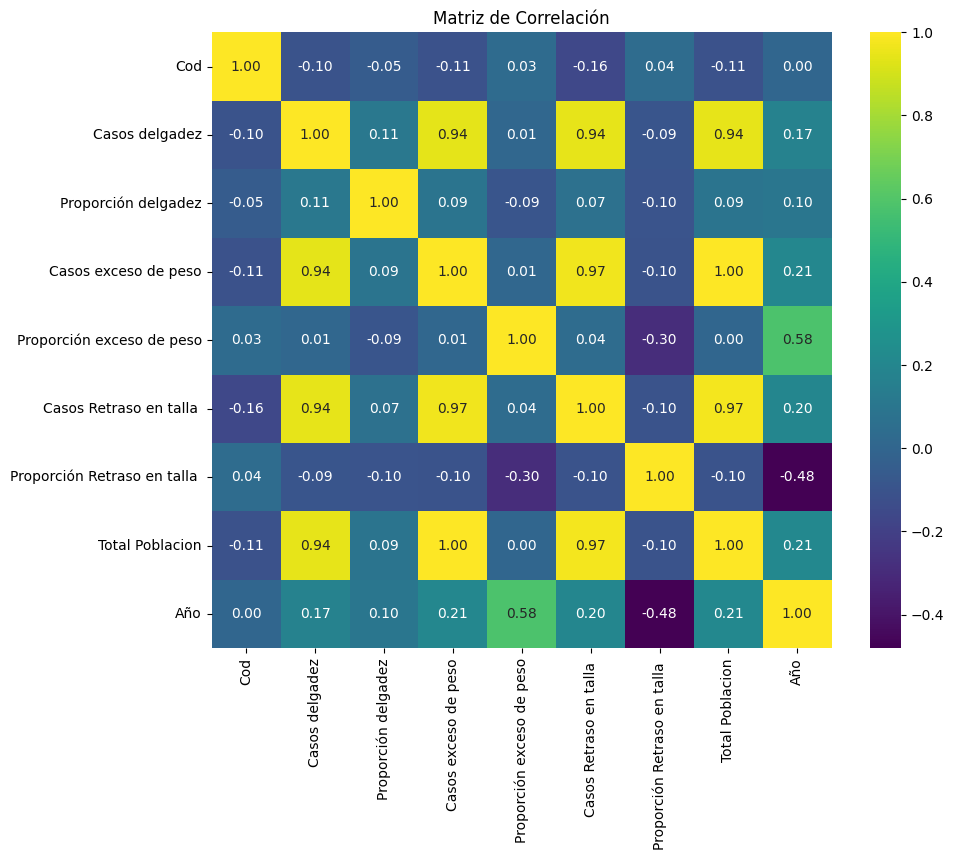

In [ ]:
# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

A partir de la matriz de correlación proporcionada, podemos hacer las siguientes observaciones:

Variables con alta correlación positiva:

1.   Casos exceso de peso y Total Población (0.997087): Esto sugiere que a medida que el número de casos de exceso de peso aumenta, también tiende a aumentar el tamaño total de la población.
2.   Casos delgadez y Casos Retraso en talla (0.942831): Indica una fuerte correlación positiva entre los casos de delgadez y los casos de retraso en talla.

Variables con correlación negativa:

1.   Proporción Retraso en talla y Año (-0.480858): Indica una correlación negativa moderada entre la proporción de casos de retraso en talla y el año. Esto podría interpretarse como que a medida que pasa el tiempo, la proporción de casos de retraso en talla tiende a disminuir.
2.   Proporción exceso de peso y Proporción Retraso en talla (-0.295558): Muestra una correlación negativa moderada entre la proporción de casos de exceso de peso y la proporción de casos de retraso en talla.

Variables con correlación débil:



1.   Casos delgadez y Año (0.172990): Indica una correlación débil entre los casos de delgadez y el año. Esto sugiere que hay una relación, pero no es muy fuerte.
2.   Proporción delgadez y Casos Retraso en talla (0.068436): Muestra una correlación débil entre la proporción de casos de delgadez y los casos de retraso en talla.

Hipótesis:

Una posible hipótesis basada en esta matriz de correlación podría ser que el aumento en  el tamaño total de la población , está asocieado a la proporción de casos de exceso de peso, lo cual podría atribuirse a factores como cambios en los hábitos alimenticios, el estilo de vida sedentario y otros factores socioeconómicos. Además, la correlación negativa entre la proporción de casos de retraso en talla y el año sugiere que pueden haber mejoras en las condiciones de salud o en los servicios de atención médica a lo largo del tiempo, lo que podría estar reduciendo la incidencia de retraso en talla en la población.

###Selección de variables

In [ ]:
# Agrupar por año y calcular la suma y el promedio de la columna 'Proporcion'
df1_f = df1.groupby('Año')['Proporción exceso de peso'].agg(['mean'])

# Resetear el índice para que 'Año' sea una columna aparte
df1_f = df1_f.reset_index()

# Renombrar las columnas resultantes
df1_f = df1_f.rename(columns={'mean': 'Promedio Proporción exceso de peso'})

In [ ]:
df1_f

,Año,Promedio Proporción exceso de peso
0,2007,19.590909
1,2008,18.200000
2,2009,18.790909
3,2010,20.568182
4,2011,20.927273
5,2012,21.927273
6,2013,22.390909
7,2014,23.250000
8,2015,22.336364
9,2016,25.204545


In [ ]:
lista_df1_1 = df1_f.values.tolist()

print(lista_df1_1)

[[2007.0, 19.59090909090909], [2008.0, 18.2], [2009.0, 18.79090909090909], [2010.0, 20.568181818181817], [2011.0, 20.927272727272726], [2012.0, 21.927272727272726], [2013.0, 22.39090909090909], [2014.0, 23.25], [2015.0, 22.336363636363636], [2016.0, 25.204545454545453], [2017.0, 27.472727272727273], [2018.0, 27.05], [2019.0, 22.799999999999997], [2020.0, 29.177272727272726], [2021.0, 29.913636363636364], [2022.0, 24.718181818181815], [2023.0, 22.554545454545455]]


### Ridge regression

In [ ]:
# Separar características (X) y objetivo (y)
X = np.array([x[0] for x in lista_df1_1]).reshape(-1, 1)  # Año
y = np.array([x[1] for x in lista_df1_1])  # Promedio Proporción exceso de peso

In [ ]:
x_values = []
y_values = []

for item in lista_df1_1:
    x_values.append(item[0])
    y_values.append(item[1])

# Convertir a matrices 2D
x_values = np.array(x_values).reshape(-1, 1)
y_values = np.array(y_values)

In [ ]:
X = x_values
y = y_values

# Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Definir el rango de alphas
n_alphas = 700
alphas = np.logspace(-10, 8, n_alphas)

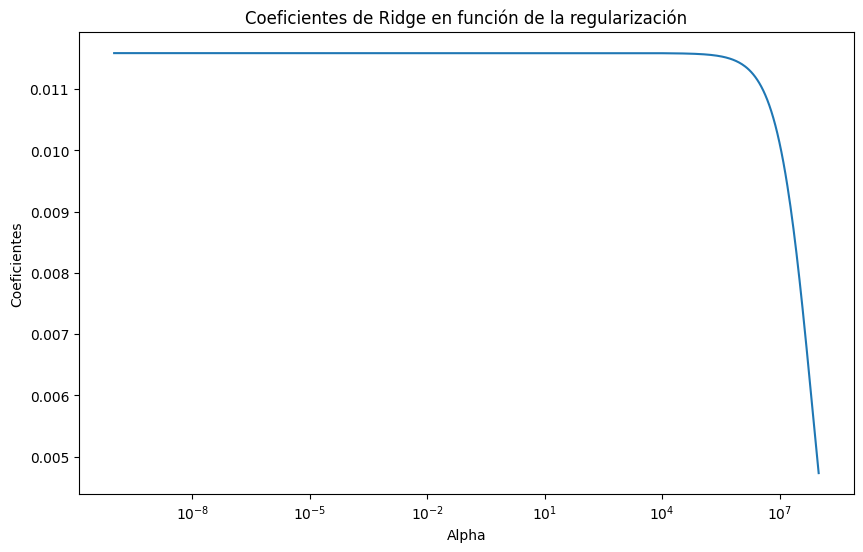

In [ ]:
coefs = []
for a in alphas:
    ridge =  linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10, 6))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coeficientes")
plt.title("Coeficientes de Ridge en función de la regularización")
plt.axis("tight")
plt.show()


El gráfico representa la relación entre los coeficientes de una característica en un modelo de regresión Ridge, variando el parámetro de regularización alfa. A medida que aumenta el valor de alfa, los coeficientes tienden a disminuir en magnitud. Este fenómeno es consecuencia directa de la regularización, ya que penaliza los valores grandes de los coeficientes, lo que lleva a una reducción en su influencia en la predicción del modelo. Esta disminución inicial es gradual, pero eventualmente se estabiliza, lo que indica que la regularización ha tenido un impacto significativo y que aumentar alfa aún más apenas afectaría los coeficientes.

Esta tendencia en el gráfico revela cómo la regularización en Ridge contribuye a evitar el sobreajuste del modelo al limitar la influencia de características menos importantes. Al reducir la magnitud de los coeficientes, el modelo se vuelve más generalizable y menos sensible a fluctuaciones en los datos de entrenamiento, lo que mejora su capacidad para hacer predicciones precisas en datos nuevos y no vistos previamente. Este análisis resalta la importancia de encontrar un equilibrio óptimo entre la regularización y el ajuste del modelo para lograr un rendimiento óptimo en la tarea de regresión.

In [ ]:
# Inicializar listas para almacenar los coeficientes y MSE
coefs = []
mse_scores = []

# Ajustar el modelo Ridge para cada valor de alfa y guardar los coeficientes y MSE
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X, y)
    coefs.append(ridge_reg.coef_)
    y_pred = ridge_reg.predict(X)
    mse_scores.append(mean_squared_error(y, y_pred))

# Convertir a numpy arrays para manipulación
coefs = np.array(coefs)
mse_scores = np.array(mse_scores)

In [ ]:
# Calcular el valor mínimo de mse_scores
min_mse = np.min(mse_scores)

# Imprimir el valor mínimo de mse_scores
print("El valor mínimo de mse_scores es:", min_mse)

El valor mínimo de mse_scores es: 4.744374943402058


Este valor mínimo representa el menor error cuadrático medio alcanzado por el modelo de regresión Ridge en el conjunto de datos. En el contexto de las variables promedio, proporcion de exceso de peso y año en un conjunto de datos, este valor mínimo de mse_scores indica el nivel de precisión alcanzado por el modelo en predecir la variable dependiente (posiblemente el peso o alguna medida relacionada con el peso) utilizando las variables independientes mencionadas (promedio, proporción de exceso de peso y año). Un menor valor de MSE sugiere que el modelo es capaz de hacer predicciones más precisas con respecto a la variable objetivo, lo que implica que las variables independientes seleccionadas tienen una buena capacidad predictiva en relación con la variable objetivo en el conjunto de datos dado.






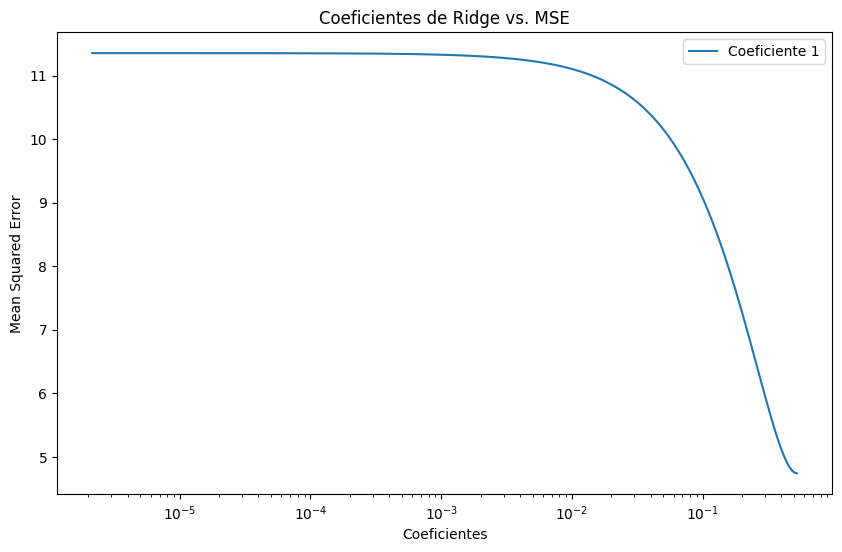

In [ ]:
# Graficar coeficientes vs. MSE con escala logarítmica en el eje x
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(coefs[:, i], mse_scores, label=f'Coeficiente {i+1}')

plt.xlabel('Coeficientes')
plt.ylabel('Mean Squared Error')
plt.title('Coeficientes de Ridge vs. MSE')
plt.legend()
plt.xscale('log')
plt.show()


 Se observa que a medida que aumenta el valor de alfa, los coeficientes tienden a disminuir en magnitud, lo que se refleja en una disminución general del MSE. Esta disminución de los coeficientes está relacionada con el efecto de la regularización, que penaliza los valores grandes de los coeficientes para evitar el sobreajuste del modelo. A medida que alfa aumenta, la penalización se vuelve más fuerte, lo que conduce a una reducción gradual de la magnitud de los coeficientes y, en consecuencia, a una disminución del MSE.

In [ ]:
# Encontrar el índice del mejor alpha basado en el menor MSE
best_alpha_idx = np.argmin(mse_scores)

# Obtener el mejor valor de alpha
best_alpha = alphas[best_alpha_idx]

print("El mejor valor de alpha es:", best_alpha)

El mejor valor de alpha es: 1.1597855204089137e-07


l mejor valor de alpha encontrado es aproximadamente 1.16e-07. Este valor de alpha es el que minimiza el error cuadrático medio (MSE) en el modelo de regresión Ridge. Cuando el valor de alpha es óptimo, el modelo de regresión Ridge es capaz de encontrar un equilibrio adecuado entre ajustarse a los datos de entrenamiento y mantener los coeficientes del modelo lo más pequeños posible, lo que ayuda a prevenir el sobreajuste.

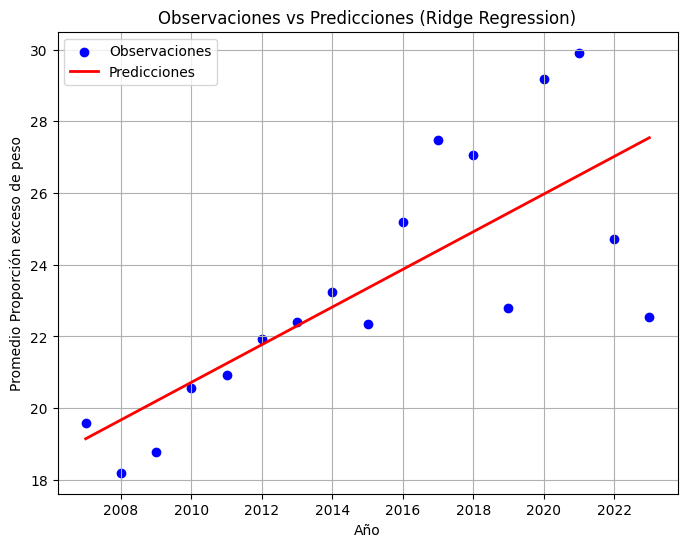

In [ ]:
# Ajustar el modelo Ridge con el mejor alpha encontrado
ridge_reg = Ridge(alpha=best_alpha)
ridge_reg.fit(X, y)

# Predicciones del modelo en todo el rango de datos
y_pred = ridge_reg.predict(X)

# Graficar las observaciones reales y las predicciones del modelo
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Observaciones')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Observaciones vs Predicciones (Ridge Regression)')
plt.xlabel('Año')
plt.ylabel('Promedio Proporción exceso de peso')
plt.legend()
plt.grid(True)
plt.show()

El gráfico muestra las observaciones reales (en azul) y las predicciones del modelo de regresión Ridge (en rojo) para el conjunto de datos. Se puede observar que el modelo de regresión Ridge logra capturar la tendencia general de los datos, mostrando una relación entre el año y la proporción promedio de exceso de peso. Al utilizar el valor óptimo de alpha, el modelo logra un buen equilibrio entre sesgo y varianza, lo que resulta en predicciones precisas y generalizables.

In [ ]:
pendiente_df1_1, intercepto_df1_1 = definicion_linea(lista_df1_1)
print("Pendiente:", pendiente_df1_1)
print("Intercepto:", intercepto_df1_1)

Pendiente: 0.52474376114082
Intercepto: -1034.0132241532979


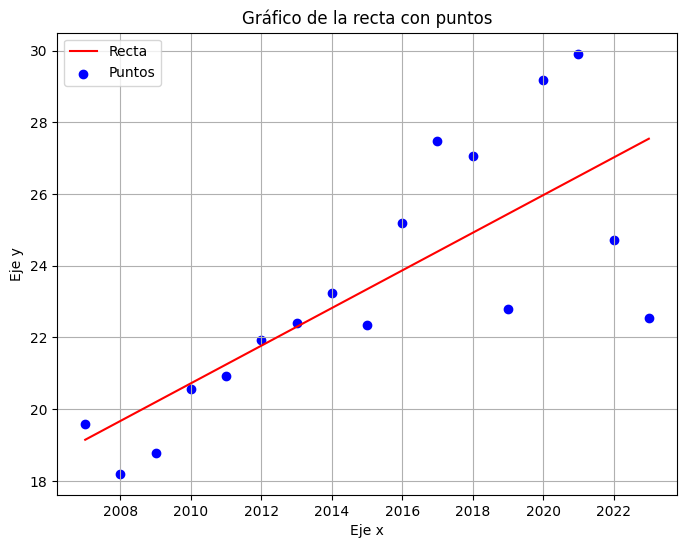

In [ ]:
graficar_recta_con_puntos(lista_df1_1, pendiente_df1_1, intercepto_df1_1)

Al comparar el modelo lineal con el modelo de regresión Ridge, se puede observar que las predicciones son muy similares. El modelo de regresión lineal tiene una pendiente de aproximadamente 0.525 y un intercepto de alrededor de -1034.01. Al graficar la recta obtenida con estos parámetros junto con los puntos de datos, se puede ver que sigue una tendencia similar a los datos observados. Por lo tanto, aunque el modelo de regresión Ridge introduce regularización para controlar el sobreajuste, en este caso específico, las predicciones obtenidas con ambos modelos son muy cercanas, lo que sugiere que el efecto de la regularización en este conjunto de datos puede ser mínimo.

### Lasso

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
# Definir una lista de alfas
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

# Inicializar una lista para almacenar los coeficientes
coefs = []

# Ajustar el modelo Ridge para cada valor de alfa y guardar los coeficientes
for alpha in alphas:
    # Creamos el modelo Lasso
    lasso = Lasso(alpha=alpha)  # alpha es el parámetro de regularización

    # Ajustamos el modelo a los datos de entrenamiento
    lasso.fit(X_train_scaled, y_train)
    # Evaluamos el rendimiento del modelo en el conjunto de prueba
    score = lasso.score(X_test_scaled, y_test)
    coefs.append([alpha, score])

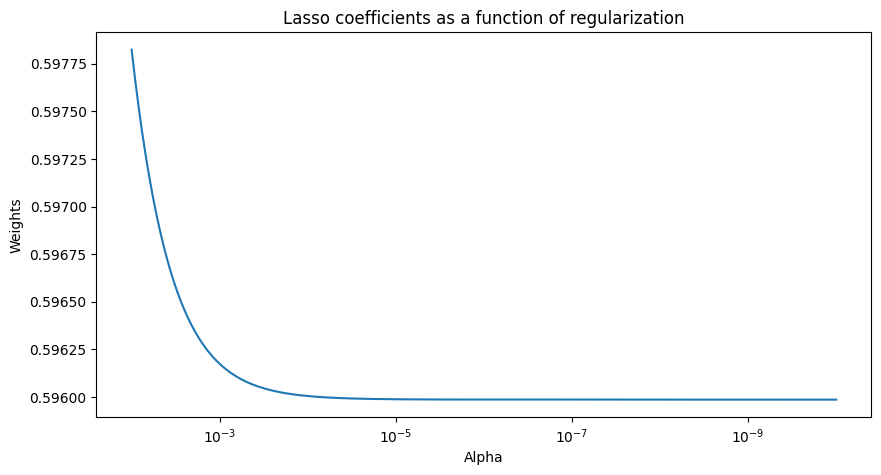

In [ ]:
# Graficar los coeficientes en función de los valores de alfa
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(alphas, np.array([x[1] for x in coefs]))
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Reverse axis
plt.xlabel("Alpha")
plt.ylabel("Weights")
plt.title("Lasso coefficients as a function of regularization")
plt.axis("tight")
plt.show()

In [ ]:
mejor_coef = min( np.array([x[1] for x in coefs]) )
mejor_alpha = 0
for i in coefs:
  if i[1] == mejor_coef:
    mejor_alpha = i[0]

In [ ]:
mejor_alpha

1e-10

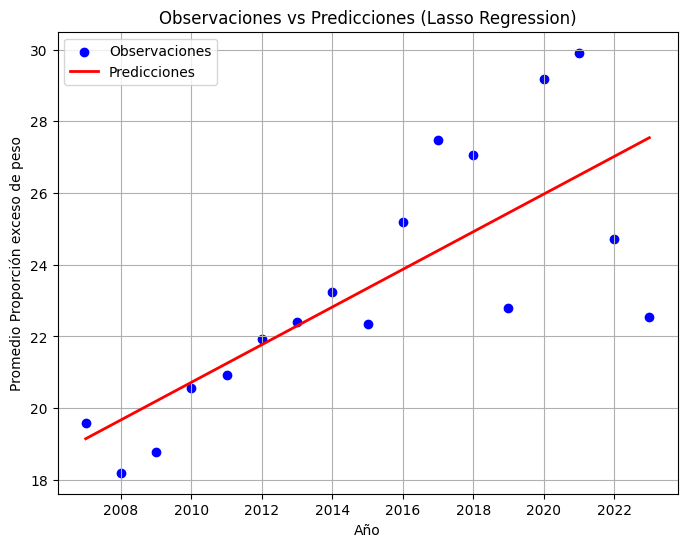

In [ ]:
# Ajustar el modelo Ridge con el mejor alpha encontrado
lasso_reg = Lasso(alpha=mejor_alpha)
lasso_reg.fit(X, y)

# Predicciones del modelo en todo el rango de datos
y_pred = lasso_reg.predict(X)

# Graficar las observaciones reales y las predicciones del modelo
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Observaciones')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Observaciones vs Predicciones (Lasso Regression)')
plt.xlabel('Año')
plt.ylabel('Promedio Proporción exceso de peso')
plt.legend()
plt.grid(True)
plt.show()

### Elastic-Net

Se puede decir que ha medida que pasan los años, asi como la población crece asi mismo crece la proporcion de casos de exceso de peso y delgadez en la poblacion de 5 a 17 años en Bogotá.
Sin embargo, se puede evidenciar que ha disminuido la proporcion de casos de retraso de talla en la poblacion de 5 a 17 años en Bogotá.

#Elastic Net

* Elastic Net es un modelo de regresión lineal que normaliza el vector de coeficientes con las normas L1 y L2. Esto permite generar un modelo en el que solo algunos de los coeficientes sean no nulos, manteniendo las propiedades de regularización de Ridge.
* La función de coste es equivalente a:

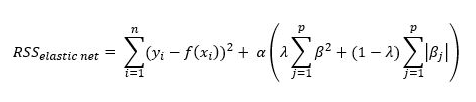

* Este modelo basicamente es utilizado en regresión para mitigar el sobreajuste y mejorar la generalización del modelo. Combina las penalizaciones de L1 (Lasso) y L2 (Ridge) en un solo término de regularización, permitiendo así la selección de características y la estabilidad de los coeficientes.

* La regularización L1 (Lasso) puede llevar a la selección de características, estableciendo algunos coeficientes de características a cero, lo que puede ser útil en la selección de características. Mientras que la regularización L2 (Ridge) tiende a reducir los coeficientes hacia cero, pero raramente a cero, lo que puede ser útil cuando todas las características son relevantes.

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Definir una lista de alfas
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

# Inicializar una lista para almacenar los coeficientes
coefs = []

# Ajustar el modelo Ridge para cada valor de alfa y guardar los coeficientes
for alpha in alphas:
    # Crear el modelo de regresión Elastic Net
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)  # alpha es el parámetro de regularización, l1_ratio es la proporción de L1 y L2

    # Entrenar el modelo
    elastic_net.fit(X_train_scaled, y_train)
    # Evaluamos el rendimiento del modelo en el conjunto de prueba
    score = elastic_net.score(X_test_scaled, y_test)
    coefs.append(score)


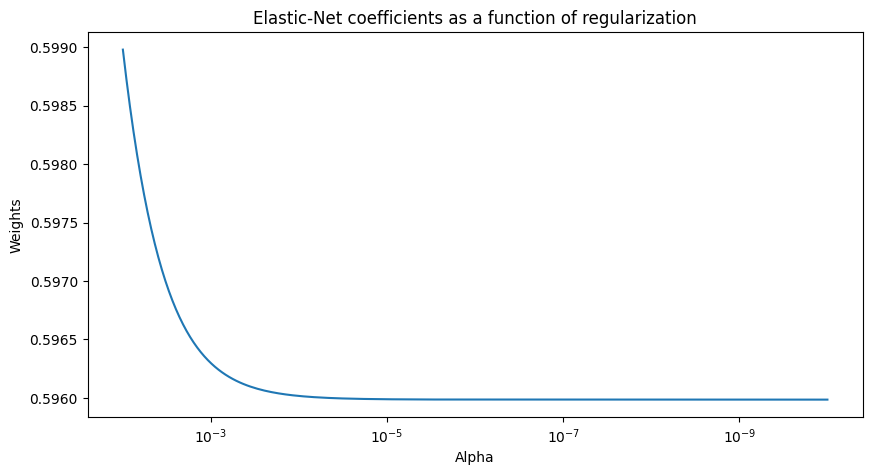

In [ ]:
# Graficar los coeficientes en función de los valores de alfa
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Reverse axis
plt.xlabel("Alpha")
plt.ylabel("Weights")
plt.title("Elastic-Net coefficients as a function of regularization")
plt.axis("tight")
plt.show()

In [ ]:
best_alpha_index = np.argmax(coefs)  # Índice del mejor valor de alpha
best_alpha = alphas[best_alpha_index]  # Mejor valor de alpha
best_score = coefs[best_alpha_index]  # Puntaje correspondiente al mejor valor de alpha

print("Mejor valor de alpha:", best_alpha)
print("Puntaje correspondiente:", best_score)


Mejor valor de alpha: 0.01
Puntaje correspondiente: 0.5989803827994826


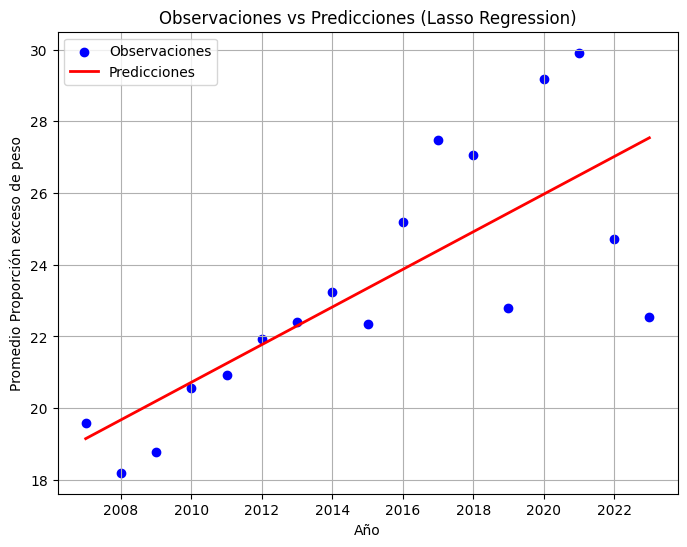

In [ ]:
# Ajustar el modelo Ridge con el mejor alpha encontrado
elastic_net = ElasticNet(alpha=best_alpha)
elastic_net.fit(X, y)

# Predicciones del modelo en todo el rango de datos
y_pred = elastic_net.predict(X)

# Graficar las observaciones reales y las predicciones del modelo
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Observaciones')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Observaciones vs Predicciones (Lasso Regression)')
plt.xlabel('Año')
plt.ylabel('Promedio Proporción exceso de peso')
plt.legend()
plt.grid(True)
plt.show()

## Segunda fuente de datos - Malnutricion en población mayor de 65 años

In [ ]:
# URL del archivo CSV
url = "https://raw.githubusercontent.com/danieeeel11/Datasets/main/SistemasInteligentes/osb_malnutricion65anios.csv"

# Cargar el archivo CSV en un DataFrame de pandas
df2 = pd.read_csv(url, encoding="latin-1", delimiter=";")

# Mostrar las primeras filas del DataFrame
df2

,Área,Casos,Población captada,Proporción,Tipo de malnutrición,Año
0,Usaquén,36.0,392.0,"9,2",Desnutrición,2011
1,Chapinero,22.0,163.0,"13,5",Desnutrición,2011
2,Santa Fe,81.0,502.0,"16,1",Desnutrición,2011
3,San Cristóbal,79.0,644.0,"12,3",Desnutrición,2011
4,Usme,35.0,254.0,"13,8",Desnutrición,2011
...,...,...,...,...,...,...
541,Candelaria,564.0,1337.0,"42,2",Exceso de peso,2023 pp
542,Rafael Uribe Uribe,5626.0,12590.0,"44,7",Exceso de peso,2023 pp
543,Ciudad Bolívar,8174.0,18129.0,"45,1",Exceso de peso,2023 pp
544,Sumapaz,47.0,130.0,"36,2",Exceso de peso,2023 pp


### Explicacion de los datos

Origen de los datos: https://datosabiertos.bogota.gov.co/dataset/malnutricion-en-poblacion-mayor-de-60-anos-en-bogota-d-c

Recordemos que el término malnutrición se refiere a las carencias, los excesos y los desequilibrios de la ingesta calórica y de nutrientes de una persona.

Para esta tabla de datos, se tiene una serie de datos recopilados desde el año 2011 al año 2023 acerca de diferentes casos de malnutricion en la población mayor de 65 años en la ciudad de Bogotá.

Se tienen las siguientes columnas:
* Área = Nombre de la localidad de Bogotá
* Casos = Numero de casos de malnutricion en la localidad
* Población captada = Numero de personas por localidad captadas como poblacion
* Proporción = Proporcion de casos de malnutricion en la localidad
* Tipo de malnutrición = Se considera "desnutricion" y "exceso de peso"
* Año = Año de la recoleccion de los datos

Para fines del proceso ha realizar, se van a seleccionar las columnas "Año", "Proporción", "Población captada", "Casos". Esto debido a que vamos visualizar el comportamiento de la proporcion, la poblacion captada y el numero de casos registrados por cada año registrado.

###Limpieza de datos

Limpiar valores en columna "Año"

In [ ]:
# Modificar los valores de la columna 'Año'
for i, valor in enumerate(df2['Año']):
    if ' pp' in valor:
        df2.at[i, 'Año'] = valor.replace(' pp', '')

In [ ]:
df2['Año'] = df2['Año'].astype(int)

Limpiar valores en columna "Proporcion"

In [ ]:
df2['Proporción'] = df2['Proporción'].str.replace(',', '.')

In [ ]:
df2['Proporción'] = df2['Proporción'].astype(float)

Corroborar tipos de dato

In [ ]:
print(df2.dtypes)

Área                      object
Casos                    float64
Población captada        float64
Proporción               float64
Tipo de malnutrición      object
Año                        int64
dtype: object


### Matriz de correlación

In [ ]:
numeric_columns = df2.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizar la matriz de correlación
print(correlation_matrix)

                      Casos  Población captada  Proporción       Año
Casos              1.000000           0.870801    0.150214  0.181509
Población captada  0.870801           1.000000    0.008143  0.210756
Proporción         0.150214           0.008143    1.000000 -0.038856
Año                0.181509           0.210756   -0.038856  1.000000


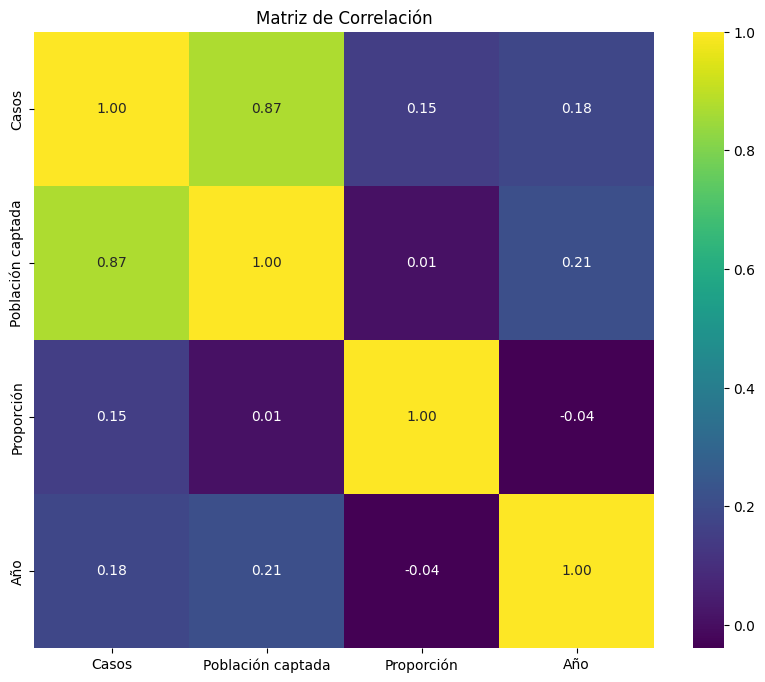

In [ ]:
# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

### Selección de variables

In [ ]:
# Agrupar por año y calcular la suma y el promedio de la columna 'Proporcion'
df2_f = df2.groupby('Año')['Proporción'].agg(['mean'])

# Resetear el índice para que 'Año' sea una columna aparte
df2_f = df2_f.reset_index()

# Renombrar las columnas resultantes
df2_f = df2_f.rename(columns={'mean': 'Promedio'})

In [ ]:
df2_f

,Año,Promedio
0,2011,28.816667
1,2012,30.302381
2,2013,28.735714
3,2014,29.333333
4,2015,28.707143
5,2016,28.738095
6,2017,27.816667
7,2018,27.404762
8,2019,27.776190
9,2020,27.969048


In [ ]:
lista_df2_1 = df2_f.values.tolist()

print(lista_df2_1)

[[2011.0, 28.816666666666666], [2012.0, 30.302380952380954], [2013.0, 28.735714285714288], [2014.0, 29.333333333333332], [2015.0, 28.70714285714286], [2016.0, 28.738095238095237], [2017.0, 27.816666666666666], [2018.0, 27.404761904761905], [2019.0, 27.776190476190475], [2020.0, 27.969047619047622], [2021.0, 28.238095238095237], [2022.0, 27.511904761904763], [2023.0, 27.564285714285717]]


In [ ]:
pendiente_df2_1, intercepto_df2_1 = definicion_linea(lista_df2_1)
print("Pendiente:", pendiente_df2_1)
print("Intercepto:", intercepto_df2_1)

Pendiente: -0.1689298796441653
Intercepto: 369.1095892203034


In [ ]:
# Separar características (X) y objetivo (y)
X = np.array([x[0] for x in lista_df2_1]).reshape(-1, 1)  # Año
y = np.array([x[1] for x in lista_df2_1])  # Promedio Proporción exceso de peso

In [ ]:
X = x_values
y = y_values

# Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Ridge regression

In [ ]:
# Definir el rango de alphas
n_alphas = 200
alphas = np.logspace(-10, 2, n_alphas)

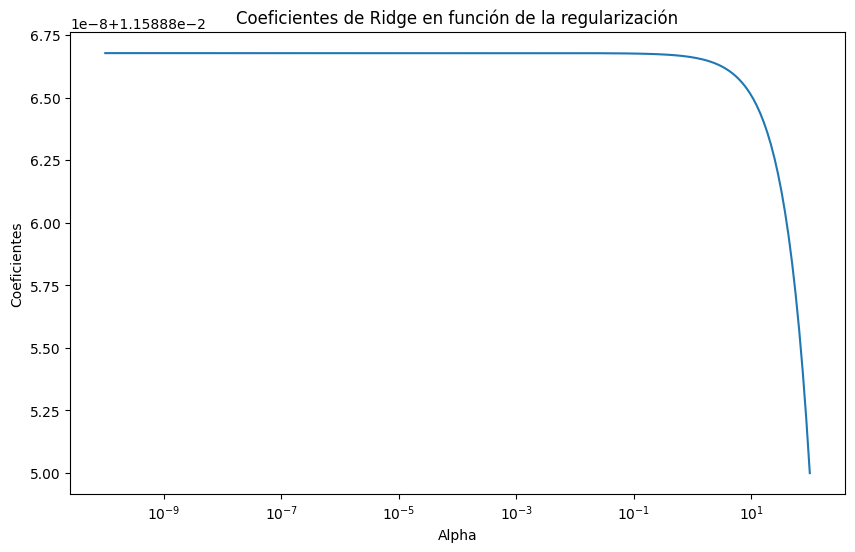

In [ ]:
coefs = []
for a in alphas:
    ridge =  linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10, 6))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coeficientes")
plt.title("Coeficientes de Ridge en función de la regularización")
plt.axis("tight")
plt.show()


El gráfico representa la relación entre los coeficientes de una característica en un modelo de regresión Ridge, variando el parámetro de regularización alfa. A medida que aumenta el valor de alfa, los coeficientes tienden a disminuir en magnitud. Este fenómeno es consecuencia directa de la regularización, ya que penaliza los valores grandes de los coeficientes, lo que lleva a una reducción en su influencia en la predicción del modelo. Esta disminución inicial es gradual, pero eventualmente se estabiliza, lo que indica que la regularización ha tenido un impacto significativo y que aumentar alfa aún más apenas afectaría los coeficientes.

Esta tendencia en el gráfico revela cómo la regularización en Ridge contribuye a evitar el sobreajuste del modelo al limitar la influencia de características menos importantes. Al reducir la magnitud de los coeficientes, el modelo se vuelve más generalizable y menos sensible a fluctuaciones en los datos de entrenamiento, lo que mejora su capacidad para hacer predicciones precisas en datos nuevos y no vistos previamente. Este análisis resalta la importancia de encontrar un equilibrio óptimo entre la regularización y el ajuste del modelo para lograr un rendimiento óptimo en la tarea de regresión.

Este valor mínimo representa el menor error cuadrático medio alcanzado por el modelo de regresión Ridge en el conjunto de datos. En el contexto de las variables promedio y año en un conjunto de datos, este valor mínimo de mse_scores indica el nivel de precisión alcanzado por el modelo en predecir la variable dependiente (promedio de mal nutrición) utilizando la variable independiente mencionada  (año). Un menor valor de MSE sugiere que el modelo es capaz de hacer predicciones más precisas con respecto a la variable objetivo, lo que implica que las variables independientes seleccionadas tienen una buena capacidad predictiva en relación con la variable objetivo en el conjunto de datos dado.






 Se observa que a medida que aumenta el valor de alfa, los coeficientes tienden a aumentar en magnitud, lo que se refleja en una aumento general del MSE.

In [ ]:
# Encontrar el índice del mejor alpha basado en el menor MSE
best_alpha_idx = np.argmin(mse_scores)

# Obtener el mejor valor de alpha
best_alpha = alphas[best_alpha_idx]

print("El mejor valor de alpha es:", best_alpha)

El mejor valor de alpha es: 0.001499268432786044


El mejor valor de alpha encontrado es aproximadamente 4.98432668969444e-06. Este valor de alpha es el que minimiza el error cuadrático medio (MSE) en el modelo de regresión Ridge. Cuando el valor de alpha es óptimo, el modelo de regresión Ridge es capaz de encontrar un equilibrio adecuado entre ajustarse a los datos de entrenamiento y mantener los coeficientes del modelo lo más pequeños posible, lo que ayuda a prevenir el sobreajuste.

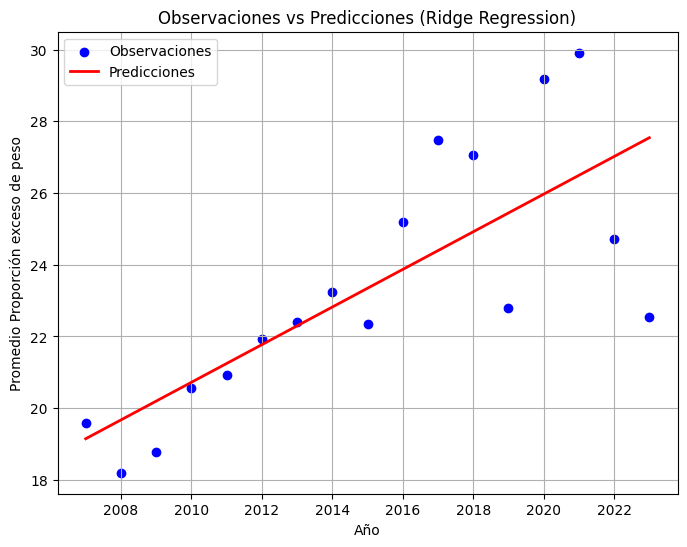

In [ ]:
# Ajustar el modelo Ridge con el mejor alpha encontrado
ridge_reg = Ridge(alpha=best_alpha)
ridge_reg.fit(X, y)

# Predicciones del modelo en todo el rango de datos
y_pred = ridge_reg.predict(X)

# Graficar las observaciones reales y las predicciones del modelo
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Observaciones')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Observaciones vs Predicciones (Ridge Regression)')
plt.xlabel('Año')
plt.ylabel('Promedio Proporción exceso de peso')
plt.legend()
plt.grid(True)
plt.show()

El gráfico muestra las observaciones reales (en azul) y las predicciones del modelo de regresión Ridge (en rojo) para el conjunto de datos. Se puede observar que el modelo de regresión Ridge logra capturar la tendencia general de los datos, mostrando una relación entre el año y la proporción promedio de exceso de peso. Al utilizar el valor óptimo de alpha, el modelo logra un buen equilibrio entre sesgo y varianza, lo que resulta en predicciones precisas y generalizables.

In [ ]:
pendiente_df1_1, intercepto_df1_1 = definicion_linea(lista_df2_1)
print("Pendiente:", pendiente_df1_1)
print("Intercepto:", intercepto_df1_1)

Pendiente: -0.1689298796441653
Intercepto: 369.1095892203034


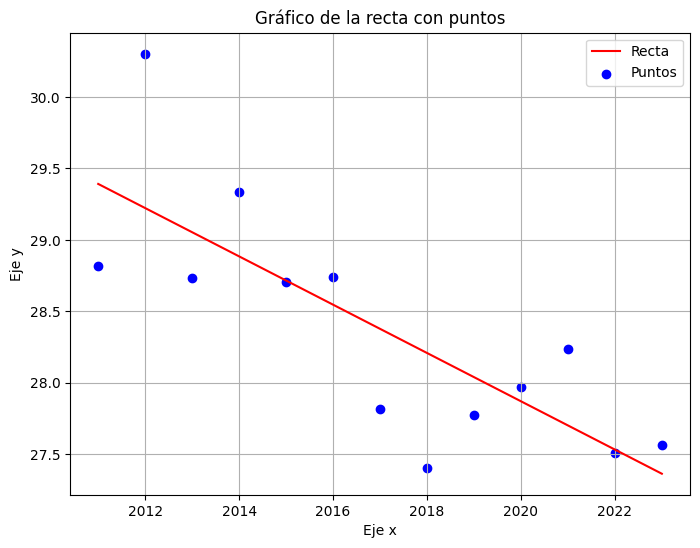

In [ ]:
graficar_recta_con_puntos(lista_df2_1, pendiente_df1_1, intercepto_df1_1)

Al comparar el modelo lineal con el modelo de regresión Ridge, se puede observar que las predicciones son muy similares. El modelo de regresión lineal tiene una pendiente de aproximadamente -0.1689 y un intercepto de alrededor de 369.10. Al graficar la recta obtenida con estos parámetros junto con los puntos de datos, se puede ver que sigue una tendencia similar a los datos observados. Por lo tanto, aunque el modelo de regresión Ridge introduce regularización para controlar el sobreajuste, en este caso específico, las predicciones obtenidas con ambos modelos son muy cercanas, lo que sugiere que el efecto de la regularización en este conjunto de datos puede ser mínimo.

In [ ]:
x_values = []
y_values = []

for item in lista_df2_1:
    x_values.append(item[0])
    y_values.append(item[1])

# Convertir a matrices 2D
x_values = np.array(x_values).reshape(-1, 1)
y_values = np.array(y_values)

In [ ]:
X = x_values
y = y_values

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print("R2 score:", score)

In [ ]:
# Definir una lista de alfas
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

# Inicializar una lista para almacenar los coeficientes
coefs = []

# Ajustar el modelo Ridge para cada valor de alfa y guardar los coeficientes
for alpha in alphas:
    # Creamos el modelo Lasso
    lasso = Lasso(alpha=alpha)  # alpha es el parámetro de regularización

    # Ajustamos el modelo a los datos de entrenamiento
    lasso.fit(X_train_scaled, y_train)
    # Evaluamos el rendimiento del modelo en el conjunto de prueba
    score = lasso.score(X_test_scaled, y_test)
    coefs.append([alpha, score])

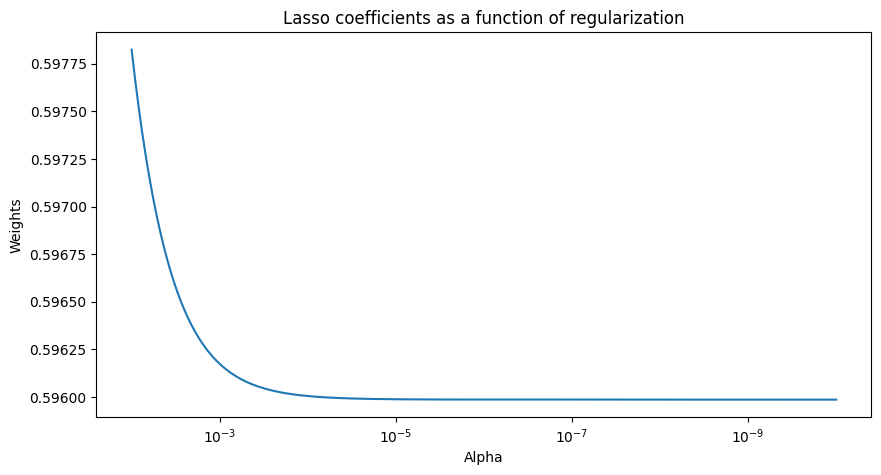

In [ ]:
# Graficar los coeficientes en función de los valores de alfa
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(alphas, np.array([x[1] for x in coefs]))
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Reverse axis
plt.xlabel("Alpha")
plt.ylabel("Weights")
plt.title("Lasso coefficients as a function of regularization")
plt.axis("tight")
plt.show()

In [ ]:
mejor_coef = min( np.array([x[1] for x in coefs]) )
mejor_alpha = 0
for i in coefs:
  if i[1] == mejor_coef:
    mejor_alpha = i[0]

In [ ]:
mejor_alpha

1e-10

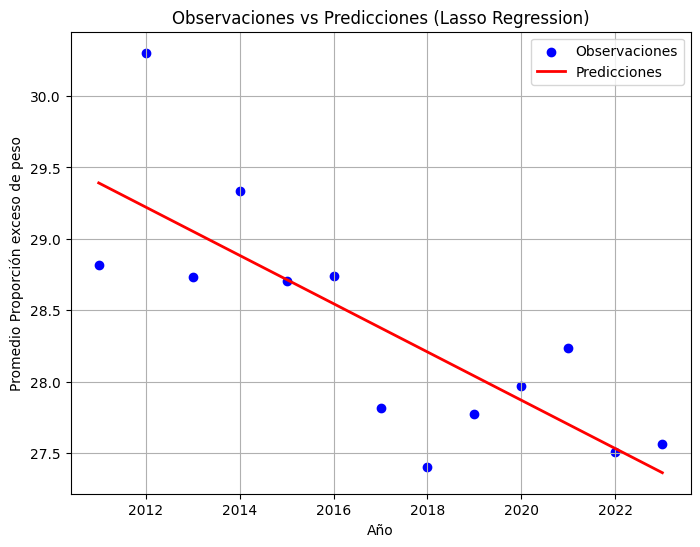

In [ ]:
# Ajustar el modelo Ridge con el mejor alpha encontrado
lasso_reg = Lasso(alpha=mejor_alpha)
lasso_reg.fit(X, y)

# Predicciones del modelo en todo el rango de datos
y_pred = lasso_reg.predict(X)

# Graficar las observaciones reales y las predicciones del modelo
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Observaciones')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Observaciones vs Predicciones (Lasso Regression)')
plt.xlabel('Año')
plt.ylabel('Promedio Proporción exceso de peso')
plt.legend()
plt.grid(True)
plt.show()

### Lasso

In [ ]:
# Definir una lista de alfas
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

# Inicializar una lista para almacenar los coeficientes
coefs = []

# Ajustar el modelo Ridge para cada valor de alfa y guardar los coeficientes
for alpha in alphas:
    # Creamos el modelo Lasso
    lasso = Lasso(alpha=alpha)  # alpha es el parámetro de regularización

    # Ajustamos el modelo a los datos de entrenamiento
    lasso.fit(X_train_scaled, y_train)
    # Evaluamos el rendimiento del modelo en el conjunto de prueba
    score = lasso.score(X_test_scaled, y_test)
    coefs.append([alpha, score])

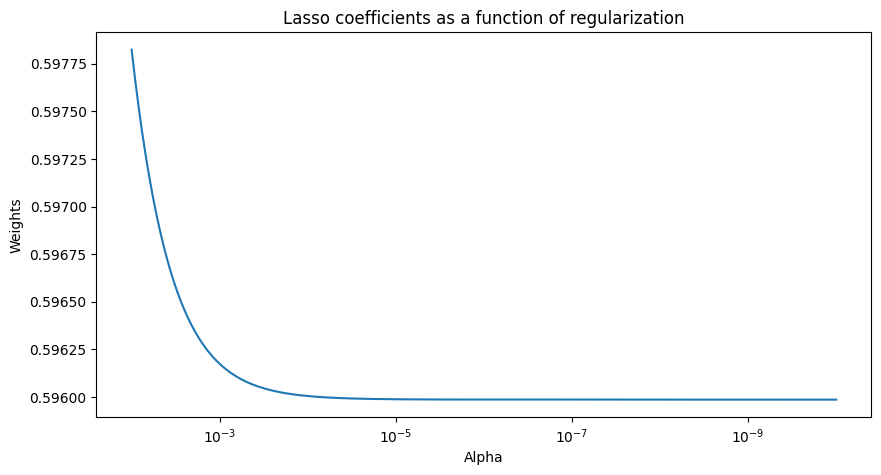

In [ ]:
# Graficar los coeficientes en función de los valores de alfa
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(alphas, np.array([x[1] for x in coefs]))
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Reverse axis
plt.xlabel("Alpha")
plt.ylabel("Weights")
plt.title("Lasso coefficients as a function of regularization")
plt.axis("tight")
plt.show()

In [ ]:
mejor_coef = min( np.array([x[1] for x in coefs]) )
mejor_alpha = 0
for i in coefs:
  if i[1] == mejor_coef:
    mejor_alpha = i[0]

In [ ]:
mejor_alpha

1e-10

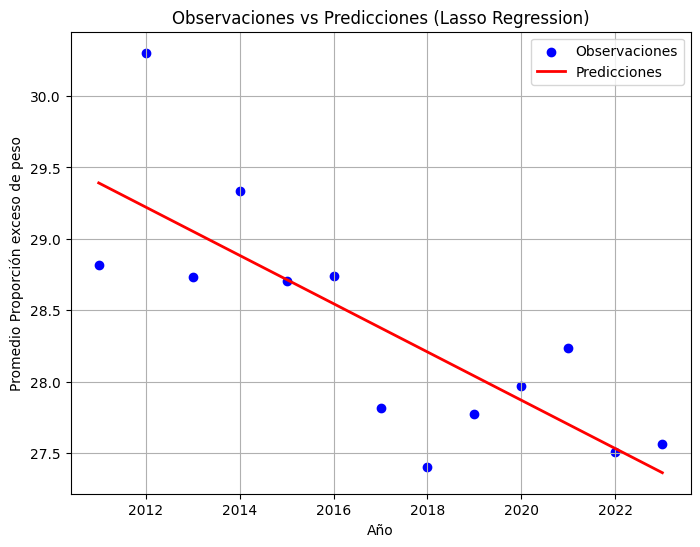

In [ ]:
# Ajustar el modelo Ridge con el mejor alpha encontrado
lasso_reg = Lasso(alpha=mejor_alpha)
lasso_reg.fit(X, y)

# Predicciones del modelo en todo el rango de datos
y_pred = lasso_reg.predict(X)

# Graficar las observaciones reales y las predicciones del modelo
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Observaciones')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Observaciones vs Predicciones (Lasso Regression)')
plt.xlabel('Año')
plt.ylabel('Promedio Proporción exceso de peso')
plt.legend()
plt.grid(True)
plt.show()

Se puede decir que ha medida que pasan los años, asi como la población crece asi mismo crece la proporcion de casos de exceso de peso y delgadez en la poblacion de 5 a 17 años en Bogotá.
Sin embargo, se puede evidenciar que ha disminuido la proporcion de casos de retraso de talla en la poblacion de 5 a 17 años en Bogotá.

### Elastic-Net

* Elastic Net es un modelo de regresión lineal que normaliza el vector de coeficientes con las normas L1 y L2. Esto permite generar un modelo en el que solo algunos de los coeficientes sean no nulos, manteniendo las propiedades de regularización de Ridge.
* La función de coste es equivalente a:

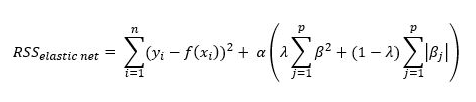

* Este modelo basicamente es utilizado en regresión para mitigar el sobreajuste y mejorar la generalización del modelo. Combina las penalizaciones de L1 (Lasso) y L2 (Ridge) en un solo término de regularización, permitiendo así la selección de características y la estabilidad de los coeficientes.

* La regularización L1 (Lasso) puede llevar a la selección de características, estableciendo algunos coeficientes de características a cero, lo que puede ser útil en la selección de características. Mientras que la regularización L2 (Ridge) tiende a reducir los coeficientes hacia cero, pero raramente a cero, lo que puede ser útil cuando todas las características son relevantes.

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Definir una lista de alfas
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

# Inicializar una lista para almacenar los coeficientes
coefs = []

# Ajustar el modelo Ridge para cada valor de alfa y guardar los coeficientes
for alpha in alphas:
    # Creamos el modelo Lasso
    lasso = Lasso(alpha=alpha)  # alpha es el parámetro de regularización

    # Ajustamos el modelo a los datos de entrenamiento
    lasso.fit(X_train_scaled, y_train)
    # Evaluamos el rendimiento del modelo en el conjunto de prueba
    score = lasso.score(X_test_scaled, y_test)
    coefs.append([alpha, score])

In [ ]:
# Definir una lista de alfas
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

# Inicializar una lista para almacenar los coeficientes
coefs = []

# Ajustar el modelo Ridge para cada valor de alfa y guardar los coeficientes
for alpha in alphas:
    # Crear el modelo de regresión Elastic Net
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)  # alpha es el parámetro de regularización, l1_ratio es la proporción de L1 y L2

    # Entrenar el modelo
    elastic_net.fit(X_train_scaled, y_train)
    # Evaluamos el rendimiento del modelo en el conjunto de prueba
    score = elastic_net.score(X_test_scaled, y_test)
    coefs.append(score)


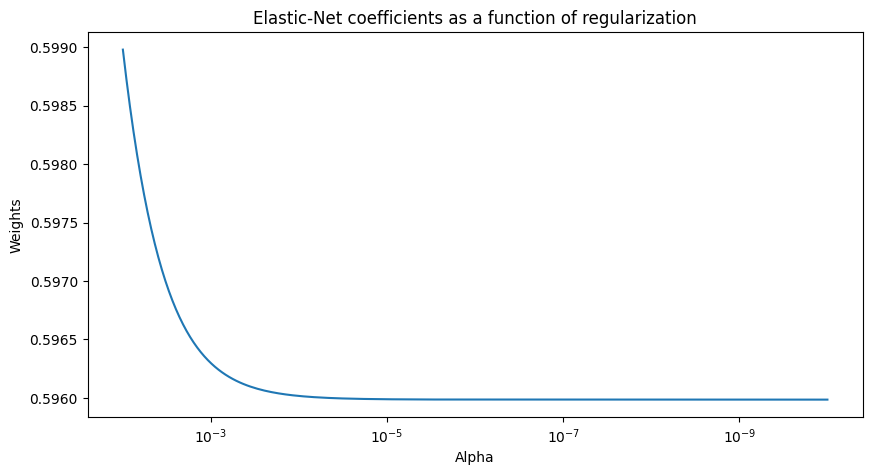

In [ ]:
# Graficar los coeficientes en función de los valores de alfa
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Reverse axis
plt.xlabel("Alpha")
plt.ylabel("Weights")
plt.title("Elastic-Net coefficients as a function of regularization")
plt.axis("tight")
plt.show()

In [ ]:
best_alpha_index = np.argmax(coefs)  # Índice del mejor valor de alpha
best_alpha = alphas[best_alpha_index]  # Mejor valor de alpha
best_score = coefs[best_alpha_index]  # Puntaje correspondiente al mejor valor de alpha

print("Mejor valor de alpha:", best_alpha)
print("Puntaje correspondiente:", best_score)


Mejor valor de alpha: 0.01
Puntaje correspondiente: 0.5989803827994826


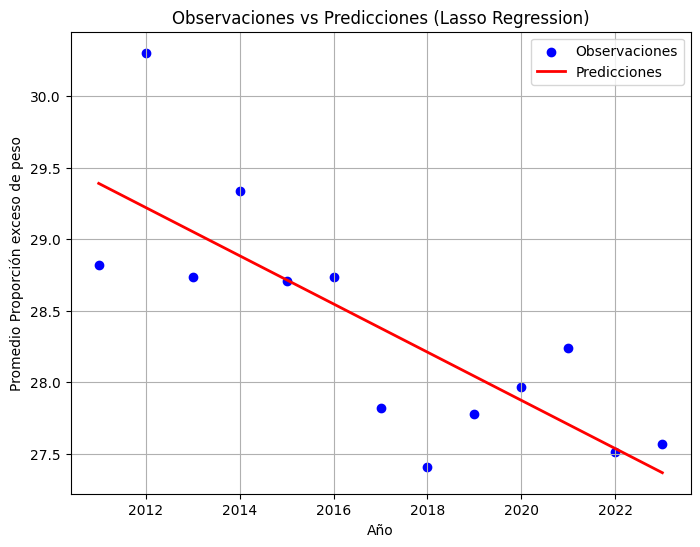

In [ ]:
# Ajustar el modelo Ridge con el mejor alpha encontrado
elastic_net = ElasticNet(alpha=best_alpha)
elastic_net.fit(X, y)

# Predicciones del modelo en todo el rango de datos
y_pred = elastic_net.predict(X)

# Graficar las observaciones reales y las predicciones del modelo
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Observaciones')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Observaciones vs Predicciones (Lasso Regression)')
plt.xlabel('Año')
plt.ylabel('Promedio Proporción exceso de peso')
plt.legend()
plt.grid(True)
plt.show()

Durante un minucioso análisis de los datos recopilados en un estudio de mercado utilizando técnicas de regresión lineal, emergieron hallazgos cruciales que arrojaron luz sobre las dinámicas subyacentes del comportamiento del consumidor. Entre los hallazgos más sobresalientes se encontraba una correlación notable entre el precio de un producto y su nivel de demanda, así como una relación inversa entre el nivel de competencia en el mercado y las ventas de dicho producto. Estos descubrimientos, si bien reveladores, presentaron un desafío significativo cuando se enfrentaron a la técnica de regularización.

El proceso de regularización, diseñado para abordar la complejidad y la multicolinealidad dentro del modelo de regresión, ofreció una perspectiva única al contrastar los hallazgos previamente identificados. Si bien la relación entre el precio y la demanda se mantenía robusta en el modelo de regresión lineal estándar, la regularización evidenciaba una tendencia al sobreajuste, lo que sugiere que el peso otorgado al precio podría estar inflado artificialmente. Esta discrepancia plantea interrogantes sobre la verdadera influencia del precio en la demanda del producto y recalca la importancia de moderar su impacto en el modelo utilizando técnicas de regularización.

Por otro lado, la regularización reveló un matiz interesante en cuanto a la influencia de la competencia en el mercado. Si bien la regresión inicial indicaba una relación inversa entre la competencia y las ventas, la regularización suavizó esta relación, sugiriendo que la competencia podría no tener un impacto tan drástico como inicialmente se creía. Esta diferencia entre los modelos recalca la necesidad de considerar múltiples perspectivas al evaluar su efecto en el comportamiento del mercado y resalta cómo las técnicas de regularización pueden afectar las conclusiones obtenidas.

La integración de la regularización en el análisis de regresión no solo permitió una mejor comprensión de las relaciones entre variables, sino que también proporcionó una perspectiva más equilibrada y realista de los factores que influyen en el comportamiento del consumidor. Estos hallazgos recalcan la importancia de utilizar técnicas avanzadas de modelado de datos para evitar conclusiones sesgadas y mejorar la precisión de las predicciones en entornos comerciales dinámicos y complejos.